In [1]:
# These are the only imports you can use for Question 1 and Question 2
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# TO-DO: Use np.load(...) to read the data then assign the data to X, and the labels to y.
X = np.load('Documents/UPenn ESE 5420/HW9/data.npy')
y = np.load('Documents/UPenn ESE 5420/HW9/label.npy')

In [17]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

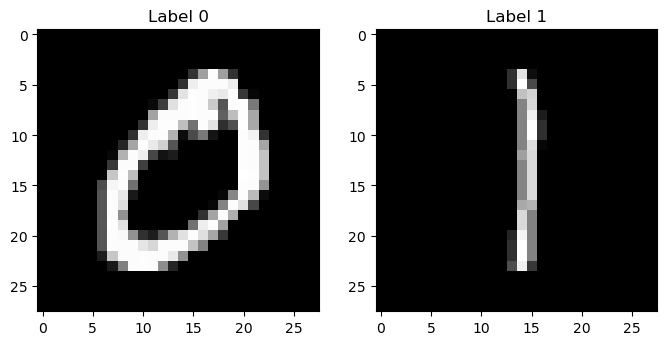

In [18]:
# TO-DO: The data should be reshaped back to [28 x 28] to be able to visualize it using plt.imshow()
# Create figure and subplots
# Visualize one example of each label
fig, axes = plt.subplots(1, 2, figsize=(8, 4))


# Find indices of the two classes
idx_0 = np.where(y == 0)[0][0]  # First index of label 0
idx_1 = np.where(y == 1)[0][0]  # First index of label 1

# Reshape and plot each example
axes[0].imshow(X[idx_0].reshape(28, 28), cmap='gray')
axes[0].set_title("Label 0")
axes[1].imshow(X[idx_1].reshape(28, 28), cmap='gray')
axes[1].set_title("Label 1")

plt.show()

Since the data is in between 0 to 255, normalize the data to [0, 1]

In [19]:
# Normalize the data
X = X / 255.0

Set  𝑦𝑖=+1  for images originally labeled 0, and  𝑦𝑖=−1  for images originally labeled 1.

In [21]:
# TO-DO: Convert labels
y = np.where(y == 0, 1, -1)

Split the data randomly into train and test with a ratio of 80:20.

In [28]:
import numpy as np

def split_data(X, y, test_size=0.2, random_state=42):
    """
    Manually splits the data into training and testing sets.

    Parameters:
        X (numpy.ndarray): Feature matrix.
        y (numpy.ndarray): Labels array.
        test_size (float): Proportion of the dataset to include in the test split.
        random_state (int): Random seed for reproducibility.

    Returns:
        X_train, y_train, X_test, y_test: Split data into training and testing sets.
    """
    # Set the random seed for reproducibility
    np.random.seed(random_state)
    
    # Determine the number of test samples
    # num_samples = X.shape[0]:
    # This line retrieves the number of samples (or rows) in X, which is the feature matrix.
    # X.shape[0] gives the number of rows in X, which corresponds to the number of data points or samples.
    # For example, if X has 100 rows and 784 columns (for a dataset of 100 images, each flattened to 784 pixels), num_samples will be 100.
    num_samples = X.shape[0]
    num_test = int(num_samples * test_size)
    
    # Shuffle indices
    # This line generates a randomly shuffled array of indices from 0 to num_samples - 1.
    # np.random.permutation(num_samples) returns a permutation of the numbers from 0 to num_samples - 1, effectively shuffling all sample indices.
    # For example, if num_samples is 100, indices might look like [42, 3, 78, 21, ..., 67, 25, 13].
    # This random shuffle allows us to split the data randomly, ensuring each sample has an equal chance of being assigned to the training or test set.
    indices = np.random.permutation(num_samples)
    
    # Split indices for training and testing
    test_indices = indices[:num_test]
    train_indices = indices[num_test:]
    
    # Split the data
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    
    return X_train, y_train, X_test, y_test

In [29]:
# Assuming X and y are your dataset and labels
X_train, y_train, X_test, y_test = split_data(X, y)

Initialize the coefficients  𝛽(1)0 ,  𝛽⃗   using a Normal Distribution of mean 0 and variance 1.

For  𝛽1 , initialize all  𝑑  entries to be  𝑁(0,1) )

In [33]:
# TO-DO: Initialize all d entries to be sampled from a standard normal distribution
# Dimensionality of the feature vector
d = 784  # or any other dimensionality for your data

# Initialize β(1)_0 as a scalar from a normal distribution with mean 0 and variance 1
B_0 = np.random.randn()

# Initialize β(1) as a d-dimensional vector from a normal distribution with mean 0 and variance 1
B = np.random.randn(d)

print("Initial beta_0:", B_0)
print("Initial beta:", B)

Initial beta_0: 0.08122550315024984
Initial beta: [-1.48021507e-01 -4.83173295e-01 -1.30795575e+00  5.91717727e-01
  5.69374157e-01 -6.16848591e-01 -1.10115514e+00  1.55610444e+00
  2.46730451e-01  3.96968291e-01  4.40147861e-01 -1.20248370e+00
  1.49927658e+00 -4.03497933e-01  8.22042004e-01  1.45843270e+00
  8.13760320e-02 -1.18147841e+00 -2.49347051e+00 -3.84158093e-02
  2.50144448e-01 -5.80775134e-01  1.35685453e-01  4.30344838e-01
  9.93927791e-01 -2.28565391e-01 -4.53416735e-02 -1.78600329e-01
  3.35946333e-02 -5.13184381e-01 -5.17965384e-01 -4.55022839e-01
  1.56266242e-01 -8.47314028e-01 -4.50993933e-01  1.80858997e+00
  8.96399341e-01 -9.57081077e-01  8.64672931e-01  6.27392074e-01
 -1.03919511e-01 -7.07972947e-01 -8.21514112e-01  2.23840173e-01
 -8.46233662e-01  1.09722133e+00  1.38080659e+00 -4.28044976e-02
  1.13878081e+00 -4.11548948e-01 -7.14351783e-01  1.10027518e+00
  1.57986696e+00  1.96315799e+00  3.32655071e-01  8.62110395e-01
  3.10617228e-01  1.40337866e+00  4.3328

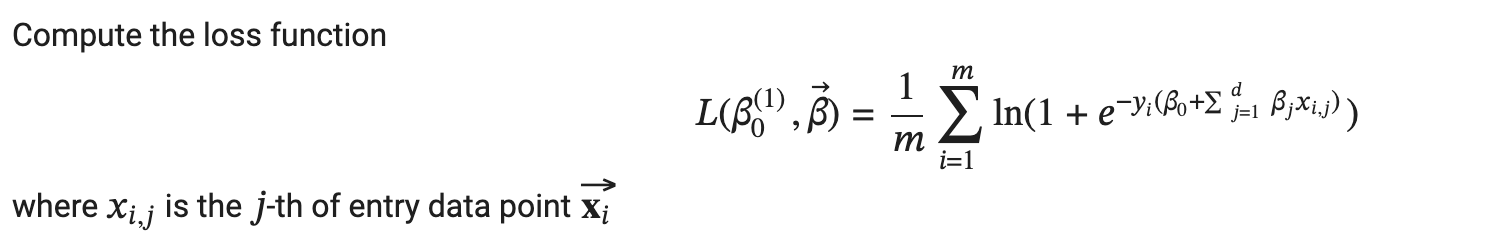

In [34]:
# TO DO: Helper function to compute loss
def compute_loss(X, y, B, B_0):
    """
    Computes the logistic loss function.

    Parameters:
        X (numpy.ndarray): Feature matrix of shape (m, d).
        y (numpy.ndarray): Labels array of shape (m,).
        B (numpy.ndarray): Weight vector of shape (d,).
        B_0 (float): Bias term (scalar).

    Returns:
        float: The average logistic loss.
    """
    m = X.shape[0]  # Number of samples

    # Calculate linear combination for each sample
    # 
    linear_combination = beta_0 + np.dot(X, beta)  # Shape (m,)

    # Calculate the term inside the logarithm
    loss_terms = np.log(1 + np.exp(-y * linear_combination))  # Shape (m,)

    # Return the average loss
    return np.mean(loss_terms)

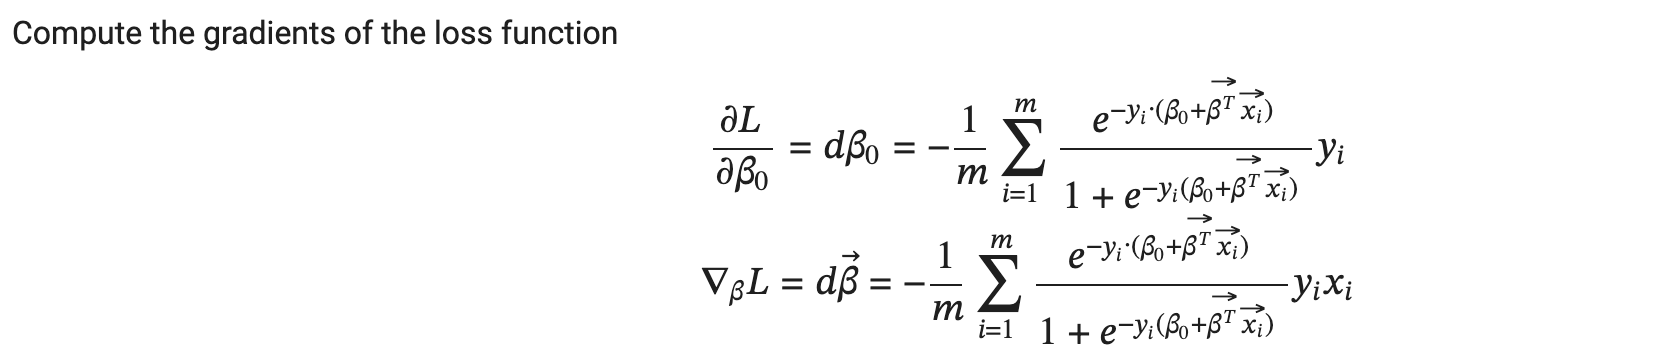

In [35]:
def compute_gradients(X, y, beta, beta_0):
    """
    Computes the gradients of the logistic loss function with respect to beta and beta_0.

    Parameters:
        X (numpy.ndarray): Feature matrix of shape (m, d).
        y (numpy.ndarray): Labels array of shape (m,).
        beta (numpy.ndarray): Weight vector of shape (d,).
        beta_0 (float): Bias term (scalar).

    Returns:
        d_beta (numpy.ndarray): Gradient with respect to beta, shape (d,).
        d_beta_0 (float): Gradient with respect to beta_0, a scalar.
    """
    m = X.shape[0]  # Number of samples

    # Calculate the linear combination for each sample
    linear_combination = beta_0 + np.dot(X, beta)  # Shape (m,)

    # Calculate the exponent term: e^(-y * (beta_0 + beta^T * x_i))
    exp_term = np.exp(-y * linear_combination)  # Shape (m,)

    # Calculate the common factor: e^(-y * (beta_0 + beta^T * x_i)) / (1 + e^(-y * (beta_0 + beta^T * x_i)))
    factor = exp_term / (1 + exp_term)  # Shape (m,)

    # Gradient with respect to beta_0
    d_beta_0 = -np.mean(factor * y)

    # Gradient with respect to beta (vectorized)
    # Adding [:, np.newaxis] reshapes this vector from shape (m,) to shape (m, 1).
    # This allows it to broadcast correctly in the next step, where it is multiplied by X.
    d_beta = -np.mean((factor * y)[:, np.newaxis] * X, axis=0)

    return d_beta, d_beta_0

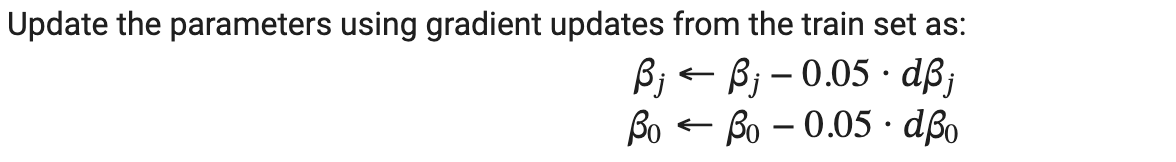

Repeat the process for 50 iterations. You should save your results for each of the 50 epochs in `accuracy_hist`, `train_loss_hist`, and `test_loss_hist`.

In [38]:
# TO-DO: Write your code below. This will be the longest part!
import numpy as np
import matplotlib.pyplot as plt

# Assume X_train, y_train, X_test, y_test are already prepared
# Normalized data, with labels adjusted to +1 for '0' and -1 for '1'

# Initialize parameters
d = X_train.shape[1]  # Number of features
np.random.seed(0)  # For reproducibility
beta = np.random.randn(d)  # d-dimensional vector for weights
beta_0 = np.random.randn()  # Scalar for the bias term

# Learning rate and number of iterations
learning_rate = 0.05
num_iterations = 50

# Arrays to store loss and accuracy for each iteration
train_loss_hist = []
test_loss_hist = []
accuracy_hist = []

# Function to compute the logistic loss
def compute_loss(X, y, beta, beta_0):
    m = X.shape[0]
    linear_combination = beta_0 + np.dot(X, beta)
    loss_terms = np.log(1 + np.exp(-y * linear_combination))
    return np.mean(loss_terms)

# Function to compute gradients
def compute_gradients(X, y, beta, beta_0):
    m = X.shape[0]
    linear_combination = beta_0 + np.dot(X, beta)
    exp_term = np.exp(-y * linear_combination)
    factor = exp_term / (1 + exp_term)
    d_beta_0 = -np.mean(factor * y)
    d_beta = -np.mean((factor * y)[:, np.newaxis] * X, axis=0)
    return d_beta, d_beta_0

# Training loop with gradient descent
for epoch in range(num_iterations):
    # Compute training loss and gradients
    train_loss = compute_loss(X_train, y_train, beta, beta_0)
    train_loss_hist.append(train_loss)
    
    d_beta, d_beta_0 = compute_gradients(X_train, y_train, beta, beta_0)
    
    # Update parameters with specified learning rate
    beta -= 0.05 * d_beta
    beta_0 -= 0.05 * d_beta_0
    
    # Compute test loss
    test_loss = compute_loss(X_test, y_test, beta, beta_0)
    test_loss_hist.append(test_loss)
    
    # Calculate accuracy on the test set
    def calculate_accuracy(X, y, beta, beta_0):
        predictions = beta_0 + np.dot(X, beta) >= 0
        correct_predictions = predictions == (y == 1)
        return np.mean(correct_predictions)

    test_accuracy = calculate_accuracy(X_test, y_test, beta, beta_0)
    accuracy_hist.append(test_accuracy)



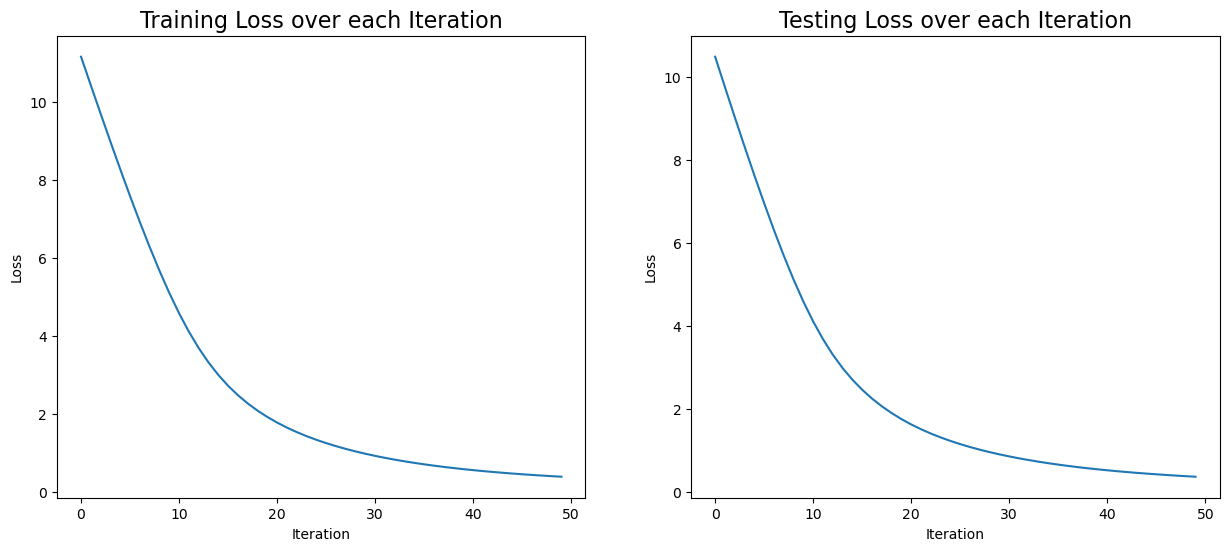

In [39]:
fig = plt.figure(figsize = (15,6))

# Plot Loss Function
ax1 = fig.add_subplot(121)
ax1.plot(train_loss_hist);
ax1.set_title("Training Loss over each Iteration", fontsize = 16);
ax1.set_xlabel("Iteration");
ax1.set_ylabel("Loss");

# Plot Accuracy Function
ax2 = fig.add_subplot(122)
ax2.plot(test_loss_hist);
ax2.set_title("Testing Loss over each Iteration", fontsize = 16);
ax2.set_xlabel("Iteration");
ax2.set_ylabel("Loss");

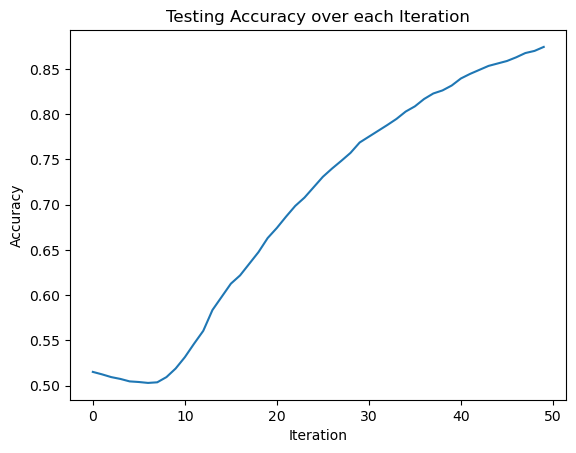

In [40]:
# Plot your accuracy curve below by running the template code below
plt.plot(accuracy_hist);
plt.title("Testing Accuracy over each Iteration");
plt.xlabel("Iteration");
plt.ylabel("Accuracy");